In [1]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")

PyTorch version: 2.3.1
CUDA available: True
CUDA version: 12.1


In [2]:
# Check mmengine installation
import mmengine
print(f"MMengine: {mmengine.__version__}")

# Check Openmim installation
from importlib.metadata import version
print(f"Openmim: {version('openmim')}")

# Check mmcv installation
import mmcv
print("mmcv:",mmcv.__version__)

# Check MMDetection installation
import mmdet
print("mmdetection:",mmdet.__version__)

MMengine: 0.10.4
Openmim: 0.3.9
mmcv: 2.0.0rc4
mmdetection: 3.3.0


In [3]:
#from mmdet.apis import init_detector, inference_detector
#import mmcv
#import matplotlib.pyplot as plt

#config_file = 'mmdetection/configs/htc/htc_r50_fpn_1x_coco.py'
#checkpoint_file = 'mmdetection/configs/htc/checkpoint/htc_r50_fpn_1x_coco_20200317-7332cf16.pth'
#model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
#inference_detector(model, 'mmdetection/demo/demo.jpg')

import mmcv
import mmengine
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
# Choose to use a config and initialize the detector
config_file = 'mmdetection/configs/htc/htc_r50_fpn_1x_coco.py'
# Setup a checkpoint file to load
checkpoint_file = 'mmdetection/configs/htc/checkpoint/htc_r50_fpn_1x_coco_20200317-7332cf16.pth'

# register all modules in mmdet into the registries
register_all_modules()

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cuda:0'

c:\users\ja683\onedrive - university of sussex\htc\mmdetection\mmdet\models\losses\cross_entropy_loss.py:240: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: mmdetection/configs/htc/checkpoint/htc_r50_fpn_1x_coco_20200317-7332cf16.pth


In [4]:
# Use the detector to do inference
image = mmcv.imread('mmdetection/demo/demo.jpg',channel_order='rgb')
result = inference_detector(model, image)
print(result)

<DetDataSample(

    META INFORMATION
    img_path: None
    pad_shape: (800, 1216)
    img_id: 0
    ori_shape: (427, 640)
    scale_factor: (1.8734375, 1.873536299765808)
    batch_input_shape: (800, 1216)
    img_shape: (800, 1199)

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([13,  2,  2,  2,  2,  2,  2,  2,  2,  2, 56,  2,  2,  2,  2,  0,  2,  2,
                         0,  2,  0,  2,  2,  2,  0,  2,  2,  0,  2,  2,  7,  2,  2,  0,  2, 13,
                         2,  2,  2,  2,  2,  7,  2,  7,  2,  2,  0,  2, 13,  7,  2, 13,  7,  2,
                         0, 13,  2,  7,  2, 13,  7, 13,  2,  2,  2,  2,  2,  7,  0,  5,  2,  7,
                         2,  0,  2,  0,  0,  2,  2,  7,  7, 10,  2,  2,  0, 10,  2,  2,  2,  5,
                         7,  2, 56,  0,  7,  7,  0,  2,  2,  2], device='cuda:0')
            bboxes: tensor([[2.2250e+02, 1.7644e+02, 4.5770e+02, 3.8450e+02]

c:\users\ja683\onedrive - university of sussex\htc\mmdetection\mmdet\models\roi_heads\mask_heads\fcn_mask_head.py:339: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  mask_preds = bboxes.new_tensor(mask_preds)


In [5]:
from mmdet.registry import VISUALIZERS
# init visualizer(run the block only once in jupyter notebook)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

C:\Users\ja683\AppData\Roaming\Python\Python311\site-packages\mmengine\visualization\visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


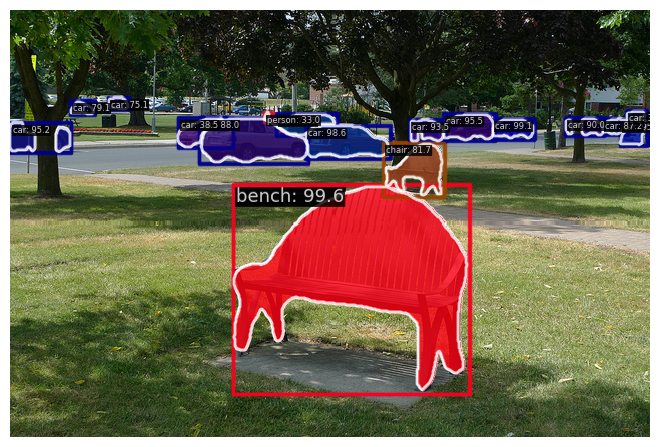

In [6]:
# show the results
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time=0,
)
visualizer.show()

## Testing custom Data

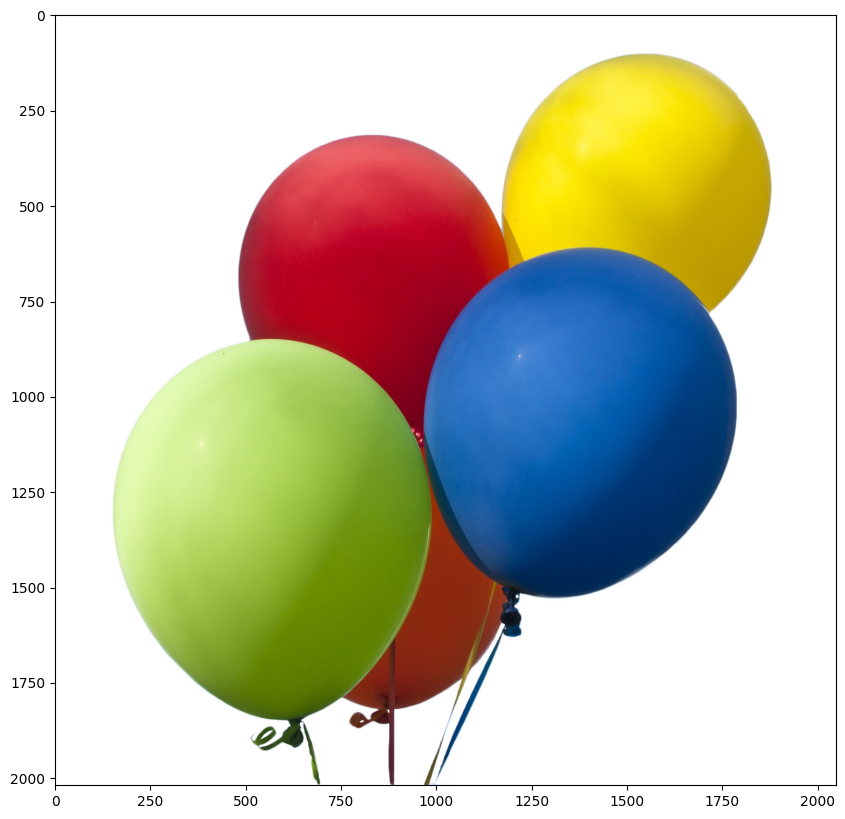

In [7]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('ballondatasets/balloon/train/10464445726_6f1e3bbe6a_k.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [8]:
# Check the label of a single image
import mmengine

annotation = mmengine.load('./ballondatasets/balloon/train/via_region_data.json')

In [16]:
# The annotation is a dict, and its values looks like the following
annotation['34020010494_e5cb88e1c4_k.jpg1115004']

{'fileref': '',
 'size': 1115004,
 'filename': '34020010494_e5cb88e1c4_k.jpg',
 'base64_img_data': '',
 'file_attributes': {},
 'regions': {'0': {'shape_attributes': {'name': 'polygon',
    'all_points_x': [1020,
     1000,
     994,
     1003,
     1023,
     1050,
     1089,
     1134,
     1190,
     1265,
     1321,
     1361,
     1403,
     1428,
     1442,
     1445,
     1441,
     1427,
     1400,
     1361,
     1316,
     1269,
     1228,
     1198,
     1207,
     1210,
     1190,
     1177,
     1172,
     1174,
     1170,
     1153,
     1127,
     1104,
     1061,
     1032,
     1020],
    'all_points_y': [963,
     899,
     841,
     787,
     738,
     700,
     663,
     638,
     621,
     619,
     643,
     672,
     720,
     765,
     800,
     860,
     896,
     942,
     990,
     1035,
     1079,
     1112,
     1129,
     1134,
     1144,
     1153,
     1166,
     1166,
     1150,
     1136,
     1129,
     1122,
     1112,
     1084,
     1037,
     989,

In [10]:
import os.path as osp

def convert_balloon_to_coco(ann_file, out_file, image_prefix):
    data_infos = mmengine.load(ann_file)

    annotations = []
    images = []
    obj_count = 0
    for idx, v in enumerate(mmengine.track_iter_progress(list(data_infos.values()))):
        filename = v['filename']
        img_path = osp.join(image_prefix, filename)
        height, width = mmcv.imread(img_path).shape[:2]

        images.append(dict(
            id=idx,
            file_name=filename,
            height=height,
            width=width))

        bboxes = []
        labels = []
        masks = []
        for _, obj in v['regions'].items():
            assert not obj['region_attributes']
            obj = obj['shape_attributes']
            px = obj['all_points_x']
            py = obj['all_points_y']
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            x_min, y_min, x_max, y_max = (
                min(px), min(py), max(px), max(py))


            data_anno = dict(
                image_id=idx,
                id=obj_count,
                category_id=0,
                bbox=[x_min, y_min, x_max - x_min, y_max - y_min],
                area=(x_max - x_min) * (y_max - y_min),
                segmentation=[poly],
                iscrowd=0)
            annotations.append(data_anno)
            obj_count += 1

    coco_format_json = dict(
        images=images,
        annotations=annotations,
        categories=[{'id':0, 'name': 'balloon'}])
    mmengine.dump(coco_format_json, out_file)

In [11]:
convert_balloon_to_coco(
    './ballondatasets/balloon/train/via_region_data.json',
    './ballondatasets/balloon/train/annotation_coco.json',
    './ballondatasets/balloon/train/')
convert_balloon_to_coco(
    './ballondatasets/balloon/val/via_region_data.json',
    './ballondatasets/balloon/val/annotation_coco.json',
    './ballondatasets/balloon/val/')

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 61/61, 72.5 task/s, elapsed: 1s, ETA:     0s
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 13/13, 70.6 task/s, elapsed: 0s, ETA:     0s


In [12]:
from pycocotools.coco import COCO

# Path to load the COCO annotation file
annotation_file = './ballondatasets/balloon/train/annotation_coco.json'

# Initialise the COCO object
coco = COCO(annotation_file)

# Get all category tags and corresponding category IDs
categories = coco.loadCats(coco.getCatIds())
category_id_to_name = {cat['id']: cat['name'] for cat in categories}

# Print all category IDs and corresponding category names
for category_id, category_name in category_id_to_name.items():
    print(f"Category ID: {category_id}, Category Name: {category_name}")

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Category ID: 0, Category Name: balloon
